### Stock Market Predictions using Machine Learning

Machine learning is all about using the past input to make future predictions isn't it? So ... does that mean we can predict future stock prices!? (The sane answer is not exactly)

In this post I use Siraj Raval's youtube video as inspiration and attempt to recreate his teachings on how to create a simple neural net to predict stock prices. 

Historically speaking, investors are always making educated guesses by analyzing data. They read the financial times, keep an eye on world news, industry trends and a score of other data points that they use in combination with their experience on the market to make high (hopefully) yielding investments. 

If you were to listen to Burton Malkiel, the author of "A Random Walk Down Wall Street" he would say that "a blind folded monkey throwing darts at a newpaper's financial pages could select a potfolio that would do just as well as one carefully selected by an expert". Thanks Mr. Malkiel.

The fact of the matter is that the top firms today do infact implement machine learning techniques to create algorithms that can be deployed to make more informed investments. If you were to go into any one of these top firms, you would be sure to find rows of machine learning experts working with predictive models. It is estimated that about 70% of wall street is placed on software today, in this age of the algorithms.

Quantative analysis is a financial field that has been around for over two decades that studies how certain variables correlate with stock price behavior. With the advent of excel in the late 1900s, financial data could finally be modelled and computed on spreadsheets. This was the begining of a new era on the wall street.

Financial prediction was a field mostly restricted to the acedemia and top financial firms up until very recently. With the advent of librairies like Tensorflow, even a student like me is now equipped to build powerful predictive models trained on massive datasets and that is just what I am about to do. I will build a model using Keras with a Tensorflow backend.

For my training data, I will be using the daily closing price of the S&P 500 from January 2000 to August 2016. This is a series of data points indexed in time order. The goal here is to predict the closing price at any date past the training. 


I start off by loading the essential libraries:

In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential 
import lstm, time 

Using TensorFlow backend.


Next, I load the date with a load data function. All this basically does is reads the CSV file into an array of values and normalizes it, instead of feeding the values directly into the model. This improves convergence.

In [2]:
# Load the Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In the next step I will build the model, but before that it is important to reiterate what a recurrent network is, and why it is key. Why is it difficult for us to sing a song backwards? Because our brain understands the song in a fixed sequence, where one word follows the other in a specific order accompanied by a melody, and as long as we are able to sing the previous word the next one up comes to us no problem. This is an important point. Our thoughts still have persistence but neural nets do not. If we give a net a fixed size vector as input (ex: image)it will not be able to predict the next frame in a movie because doing so requires the net to have access to a sequence of image vectors as inputs.
The same goes for any form of information. For our nets to make predictions, information needs to persist within it and this is exactly what a [recurrent neural net](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/) enables. Basically, a recurrent network has the ability to connect previous data to the present task.

They do however pose one problem, just as in our brains memories become more subtle as they fade into the past, these neural nets also have the problem of a vanishing gradient. A popular solution to this is using Long Short Term Memory (LSTM) cells.
Usually, neurons are units that apply an activation function, like a sigmoid, to a linear combination of their inputs, but in an LSTM recurrent net, these neurons are replaced by memory cells. Each cell has an input gate, an output gate and an internal state that feeds into itself across time steps with a constant weight of 1. You can read more about LSTMs [here](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

Alright then, lets build this model!

In [3]:
# Building the model

model = Sequential()

model.add(LSTM(
        input_dim = 1,
        output_dim = 50,
        return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(
        100,
        return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
        output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile (loss = 'mse', optimizer = 'rmsprop')

print ('compilation time: '), time.time() - start

compilation time: 


(None, 0.040618181228637695)

A brief explanation of the above code; for our first layer we set the input dimensions to 1 and we want 50 units for this layer. Setting the return sequence to true means that this layer's output will always be fed to the next layer. All of its activations can be seen as a sequence of predictions and this first layer has made up the input sequence. The dropout rate is set to 20%. 
I then set my next layer, which is also an LSTM with 100 units, here I set the retunr sequence to False as its output is fed to the next layer only at the end of the sequence. 
Finally I use the linear dense layer to aggregate the data from the prediction vector to a single value. 
The model is then complied using a loss function - Mean squared Error, and optimized using the gradient descent optimizer labelled rmsprop.

Next up the model is trained:

In [4]:
# Training

model.fit(
        X_train,
        y_train,
        batch_size =512,
        nb_epoch = 1,
        validation_split = 0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 13s - loss: 0.0026 - val_loss: 5.2850e-04


Above, the model is trained with the fit function, and I now test this model over the next 50 steps, at several points using matplotlib:

yo


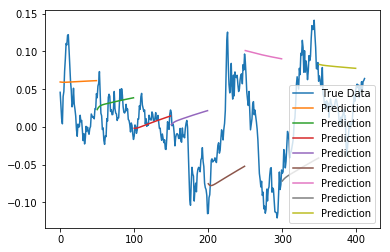

In [5]:
# Test!

predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)

Pretty cool! There is an actual corelation betweeen what our model predicts what the actual data does! Obviously this does not mean everybody can now proceed to become a millionaire. This is however, a steong analytical tool that will help us make better educated guesses about the direction in which the market is most likely to go.